# Pandas

## What is Pandas?
A Python library providing data structures and data analysis tools. The name comes from "panel data"; think about it as a way to visualize and sift through tables of data, similar to R or (heaven forfend) Excel.


## Benefits

* Efficient storage and processing of data.
* Includes many built in functions for data transformation, aggregations, and plotting.
* Great for exploratory work.

## Not so greats

* Does not scale terribly well to large datasets.

## Documentation:

* http://pandas.pydata.org/pandas-docs/stable/index.html

In [1]:
#By convention import pandas like:
import pandas as pd

#By convention import numpy like:
import numpy as np


#Make sure you have both lines when using matplotlib in Jupyter notebook
import matplotlib.pyplot as plt
%matplotlib inline


#For fake data.
from numpy.random import randn

In [2]:
np.random.randn(3,4)

array([[-2.57715708, -0.98409639,  0.44187558, -1.60063478],
       [ 0.18553235, -0.44803152, -1.30522385, -2.08304331],
       [ 0.5768679 , -0.93181679,  0.23064468,  1.11367122]])

# Pandas 
* They are built on top of NumPy NdArrays
* http://pandas.pydata.org/pandas-docs/stable/comparison_with_sql.html

## Objectives

* Create `Series` and `DataFrame`s from Python data types. 
* Create `DataFrame`s from on disk data.
* Index and Slice `pandas` objects.
* Aggregate data in `DataFrame`s.
* Join multiple `DataFrame`s.

# Pandas is built on Numpy
* Numpy is one of the fundamental packages for scientific computing in Python.


## Numpy Arrays
* Or NdArrays (n-dimensional array)
* They are like lists in Python however they allow faster computation
    1. They are stored as one contiguous block of memory, rather than being spread out across multiple locations like a list. 
    2. Each item in a numpy array is of the same data type (i.e. all integers, all floats, etc.), rather than a conglomerate of any number of data types (as a list is). We call this idea homogeneity, as opposed to the possible heterogeneity of Python lists.


Just how much faster are they? Let's take the numbers from 0 to 1 million, and sum those numbers, timing it with both a list and a numpy array.


In [3]:
numpy_array = np.arange(0, 1000000)
python_list = range(1000000)

print("python list")
time = %timeit -r 1 -o sum(python_list)
print (time.all_runs[0]/time.loops )

print("\n" + "numpy array")
time = %timeit -r 1 -o np.sum(numpy_array)
print (time.all_runs[0]/time.loops)

print("\n" + "numpy array -- standard library sum")
time = %timeit -r 1 -o sum(numpy_array)
print(time.all_runs[0]/time.loops)

python list
17.9 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 100 loops each)
0.017859501439997986

numpy array
664 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1000 loops each)
0.0006643585080000775

numpy array -- standard library sum
84.8 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 10 loops each)
0.08480327180004679


# Numpy NdArrays

* have types
* Each array is of one type

In [4]:
ints = np.array(range(3))
chars = np.array(list('ABC'))
strings = np.array(['A','BC',"DEF"])

print(ints.dtype, chars.dtype, strings.dtype)

int64 <U1 <U3


In [5]:
chars

array(['A', 'B', 'C'],
      dtype='<U1')

In [6]:
strings

array(['A', 'BC', 'DEF'],
      dtype='<U3')

In [7]:
ints

array([0, 1, 2])

In [8]:
ints*0.3

array([ 0. ,  0.3,  0.6])

In [9]:
(ints*0.3).dtype

dtype('float64')

# Creating and using NdArrays

In [10]:
my_lst_ndarray = np.array([1, 2, 3, 4, 5])
my_tuple_ndarray = np.array((1, 2, 3, 4, 5), np.int32) 

In [11]:
print(my_lst_ndarray.dtype)
print(my_tuple_ndarray.dtype)

int64
int32


In [12]:
print(my_lst_ndarray.shape)
print(my_tuple_ndarray.shape)

(5,)
(5,)


# 2D arrays

In [13]:
nd_arr = np.array([[1, 2, 3, 4, 5],[6, 7, 8, 9, 10],[11, 12, 13, 14, 15]])
nd_arr

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15]])

# Access info in the array
* Individual data
* Slices of data

In [14]:
nd_arr[1,1]

7

In [15]:
nd_arr[0:2,0:2]

array([[1, 2],
       [6, 7]])

In [16]:
nd_arr.shape

(3, 5)

In [17]:
nd_arr.sum()

120

In [18]:
nd_arr.sum?

In [19]:
nd_arr.sum(axis=1)

array([15, 40, 65])

In [20]:
nd_arr.sum(axis=0)

array([18, 21, 24, 27, 30])

In [21]:
nd_arr.max()

15

# Broadcasting

In [22]:
a = np.array([10, -10]) 
b = np.array([1, -1])
c = np.array([0.5, 4, 1])

In [23]:
a

array([ 10, -10])

In [24]:
b

array([ 1, -1])

In [25]:
a + b

array([ 11, -11])

In [26]:
c

array([ 0.5,  4. ,  1. ])

In [27]:
#a + c

In [28]:
a = np.array([[10], [-10]]) 
b = np.array([[1, 2], [-1, -2]]) 

print(a)
print('\n')
print(b)
print("\n\n")
print(a + b)

# elements will "duplicate, expand, and fill up" 
# to make the dimensions compatible for element-wise operations

[[ 10]
 [-10]]


[[ 1  2]
 [-1 -2]]



[[ 11  12]
 [-11 -12]]


In [29]:
print(a)
print(a+4)
print(a*3)

[[ 10]
 [-10]]
[[14]
 [-6]]
[[ 30]
 [-30]]


In [30]:
a = np.array([[10, 0, -10, 0],[-10, 0, -10, 0]]) 
b = np.array([[2,2],[-1,0]]) 
print (a.shape, b.shape )
print(a)
print('\n')
print(b)
print("\n\n")
print ("")
# print (a + b)



(2, 4) (2, 2)
[[ 10   0 -10   0]
 [-10   0 -10   0]]


[[ 2  2]
 [-1  0]]






In [31]:
# it's not clear how it should fill up in this case... so it can't/doesn't

----------------------------------------------------

# Pandas 


## Pandas Series
* are (one dimensional) np.ndarray vectors **with an index**
* They are built upon NdArrays

In [32]:
series = pd.Series([5775,373,7,42,np.nan,33])
print(series)
print("\n")
print(series.shape)

0    5775.0
1     373.0
2       7.0
3      42.0
4       NaN
5      33.0
dtype: float64


(6,)


In [33]:
world_series = pd.Series(["cubs","royals","giants","sox","giants","cards","giants","...",None])
world_series

0      cubs
1    royals
2    giants
3       sox
4    giants
5     cards
6    giants
7       ...
8      None
dtype: object

## Pandas Series are very powerful when dealing with dates

In [34]:
pd.date_range?

In [35]:
#Datetime index
dt_index = pd.date_range('2015-1-1', 
                        '2015-11-1', 
                        freq='m')
dt_series = pd.Series(randn(10), 
                      index = dt_index)
dt_series

2015-01-31    0.164250
2015-02-28   -0.264777
2015-03-31   -0.462482
2015-04-30   -1.171450
2015-05-31   -0.017859
2015-06-30    0.075917
2015-07-31    1.387136
2015-08-31    0.274107
2015-09-30   -1.062261
2015-10-31    0.197620
Freq: M, dtype: float64

## Series methods

In [36]:
dt_series.mean()

-0.0879798274104722

# Index
Notice how each series has an index (in this case a relatively meaningless default index).

Pandas can make great use of informative indexes. Indexes work similarly to a dictionary key, allowing fast lookups of the data associated with the index.

Indexes can also be exploited for fast group-bys, merges, time-series operations and lots more.

When you're really in the zone with pandas, you'll be thinking a lot about indexes.

In [37]:
indexed_series = pd.Series(randn(5), 
                           index = ['California', 'Alabama', 
                                    'Indiana', 'Montana', 
                                    'Kentucky'])
alt_indexed_series = pd.Series(randn(5),
                               index = ['Washington', 'Alabama', 
                                        'Montana', 'Indiana', 
                                        'New York'])
print(indexed_series)
print('\n')
print(alt_indexed_series)

California   -0.142550
Alabama      -1.415062
Indiana       0.196666
Montana      -0.519349
Kentucky      0.267551
dtype: float64


Washington   -1.277287
Alabama       0.686567
Montana       0.103336
Indiana       0.618048
New York      1.360008
dtype: float64


In [38]:
#Pandas uses the index by default to align series for arithmetic!
indexed_series + alt_indexed_series

Alabama      -0.728495
California         NaN
Indiana       0.814713
Kentucky           NaN
Montana      -0.416014
New York           NaN
Washington         NaN
dtype: float64

# Pandas DataFrames
* are a set of Pandas Series **that share the same index** 


In [39]:
pd.DataFrame(
    [[1, 2, 3], [4, 5, 6]], 
    columns=['a', 'b', 'c'], 
    index=['foo', 'bar'])

,a,b,c
foo,1,2,3
bar,4,5,6


In [40]:
df = pd.DataFrame(randn(10, 5), index=dt_index, columns=[x for x in 'abcde'])
df

,a,b,c,d,e
2015-01-31,-0.272592,-1.149775,0.544423,0.163348,-1.473606
2015-02-28,1.490248,1.632387,-0.941248,0.062705,0.975035
2015-03-31,-0.868296,-0.214874,1.303894,-0.251117,-1.467817
2015-04-30,0.941140,0.960142,-0.736216,-0.174091,0.949958
2015-05-31,-0.398114,-2.194698,-0.933277,0.236643,0.033484
2015-06-30,0.644082,-1.268265,-0.009283,-0.831093,0.128939
2015-07-31,0.599779,0.491028,-1.352749,1.605302,-0.871896
2015-08-31,1.166374,-0.216557,-0.717884,0.335699,-1.037344
2015-09-30,-0.551179,0.521832,-0.983786,0.318631,-1.437730
2015-10-31,1.090722,0.876334,0.780614,-0.555530,0.428965


## To select just one column, use brackets


In [41]:
df['a']

2015-01-31   -0.272592
2015-02-28    1.490248
2015-03-31   -0.868296
2015-04-30    0.941140
2015-05-31   -0.398114
2015-06-30    0.644082
2015-07-31    0.599779
2015-08-31    1.166374
2015-09-30   -0.551179
2015-10-31    1.090722
Freq: M, Name: a, dtype: float64

You can also use the "dot notation" for selecting a column

In [42]:
df.a

2015-01-31   -0.272592
2015-02-28    1.490248
2015-03-31   -0.868296
2015-04-30    0.941140
2015-05-31   -0.398114
2015-06-30    0.644082
2015-07-31    0.599779
2015-08-31    1.166374
2015-09-30   -0.551179
2015-10-31    1.090722
Freq: M, Name: a, dtype: float64

Note that this will fail if your column has the same name as a dataframe method, so you may wish to avoid this notation.

In [43]:
# df.

## To select one row, use .loc[]

In [44]:
df.loc['2015-10-31']

a    1.090722
b    0.876334
c    0.780614
d   -0.555530
e    0.428965
Name: 2015-10-31 00:00:00, dtype: float64

## A column of a dataframe is a series:

In [45]:
col = df['d']
type(col)

pandas.core.series.Series

## So is a row

In [46]:
row = df.loc['2015-01-31']
type(row)

pandas.core.series.Series

### The columns all have the same index:

In [47]:
col.index   

DatetimeIndex(['2015-01-31', '2015-02-28', '2015-03-31', '2015-04-30',
               '2015-05-31', '2015-06-30', '2015-07-31', '2015-08-31',
               '2015-09-30', '2015-10-31'],
              dtype='datetime64[ns]', freq='M')

### What's the index for the rows?

In [48]:
row.index

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')

In [49]:
df.index

DatetimeIndex(['2015-01-31', '2015-02-28', '2015-03-31', '2015-04-30',
               '2015-05-31', '2015-06-30', '2015-07-31', '2015-08-31',
               '2015-09-30', '2015-10-31'],
              dtype='datetime64[ns]', freq='M')

In [50]:
df.columns

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')

## Selecting multiple columns

In [51]:
df[['a','b']]

,a,b
2015-01-31,-0.272592,-1.149775
2015-02-28,1.490248,1.632387
2015-03-31,-0.868296,-0.214874
2015-04-30,0.941140,0.960142
2015-05-31,-0.398114,-2.194698
2015-06-30,0.644082,-1.268265
2015-07-31,0.599779,0.491028
2015-08-31,1.166374,-0.216557
2015-09-30,-0.551179,0.521832
2015-10-31,1.090722,0.876334


## Column operations
Just like numpy, operations are broadcast to every element of a column

In [52]:
df['a'] + df['b']

2015-01-31   -1.422367
2015-02-28    3.122635
2015-03-31   -1.083170
2015-04-30    1.901281
2015-05-31   -2.592812
2015-06-30   -0.624183
2015-07-31    1.090808
2015-08-31    0.949817
2015-09-30   -0.029348
2015-10-31    1.967056
Freq: M, dtype: float64

## Adding a new column
It's just like setting by key in a dictionary

In [53]:
df['h'] = abs(df['a'])**df['b']

In [54]:
df

,a,b,c,d,e,h
2015-01-31,-0.272592,-1.149775,0.544423,0.163348,-1.473606,4.456905
2015-02-28,1.490248,1.632387,-0.941248,0.062705,0.975035,1.917896
2015-03-31,-0.868296,-0.214874,1.303894,-0.251117,-1.467817,1.030810
2015-04-30,0.941140,0.960142,-0.736216,-0.174091,0.949958,0.943418
2015-05-31,-0.398114,-2.194698,-0.933277,0.236643,0.033484,7.548521
2015-06-30,0.644082,-1.268265,-0.009283,-0.831093,0.128939,1.747083
2015-07-31,0.599779,0.491028,-1.352749,1.605302,-0.871896,0.778014
2015-08-31,1.166374,-0.216557,-0.717884,0.335699,-1.037344,0.967221
2015-09-30,-0.551179,0.521832,-0.983786,0.318631,-1.437730,0.732822
2015-10-31,1.090722,0.876334,0.780614,-0.555530,0.428965,1.079072


## Advanced selection


### .loc 
select by row label (index), and column label

In [55]:
df.loc['2015-05-31':'2015-08-31', 'c':'e'] #Ranges by label.

,c,d,e
2015-05-31,-0.933277,0.236643,0.033484
2015-06-30,-0.009283,-0.831093,0.128939
2015-07-31,-1.352749,1.605302,-0.871896
2015-08-31,-0.717884,0.335699,-1.037344


In [56]:
df.loc['2015-05-31':'2015-08-31', 'c':'e'] = 2.7

In [57]:
df

,a,b,c,d,e,h
2015-01-31,-0.272592,-1.149775,0.544423,0.163348,-1.473606,4.456905
2015-02-28,1.490248,1.632387,-0.941248,0.062705,0.975035,1.917896
2015-03-31,-0.868296,-0.214874,1.303894,-0.251117,-1.467817,1.030810
2015-04-30,0.941140,0.960142,-0.736216,-0.174091,0.949958,0.943418
2015-05-31,-0.398114,-2.194698,2.700000,2.700000,2.700000,7.548521
2015-06-30,0.644082,-1.268265,2.700000,2.700000,2.700000,1.747083
2015-07-31,0.599779,0.491028,2.700000,2.700000,2.700000,0.778014
2015-08-31,1.166374,-0.216557,2.700000,2.700000,2.700000,0.967221
2015-09-30,-0.551179,0.521832,-0.983786,0.318631,-1.437730,0.732822
2015-10-31,1.090722,0.876334,0.780614,-0.555530,0.428965,1.079072


### .iloc
select by __positional__ index

In [58]:
df.iloc[2:4,2:5] #Ranges by number.

,c,d,e
2015-03-31,1.303894,-0.251117,-1.467817
2015-04-30,-0.736216,-0.174091,0.949958


### .ix (deprecated)
select by either label or position index
(deprecated because it led to too much ambiguity)

In [59]:
df.ix[2:-3,2:5] # Figures out what you probably want

/home/moses/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


,c,d,e
2015-03-31,1.303894,-0.251117,-1.467817
2015-04-30,-0.736216,-0.174091,0.949958
2015-05-31,2.700000,2.700000,2.700000
2015-06-30,2.700000,2.700000,2.700000
2015-07-31,2.700000,2.700000,2.700000


In [60]:
df.ix['2015-05-31':'2015-08-31', 'c':'e']

,c,d,e
2015-05-31,2.7,2.7,2.7
2015-06-30,2.7,2.7,2.7
2015-07-31,2.7,2.7,2.7
2015-08-31,2.7,2.7,2.7


# DO NOT USE .ix 
It is here so you can recognize it and scold others for using it.
  
  
--------------------------------------------------------------------------------------------     
        
      
      
# Multiple Indices

Start with a df with a single date index

In [61]:
dt_index = pd.date_range('2015-1-1', 
                        '2017-7-1', 
                        freq='m')
df = pd.DataFrame(randn(30,5), index=dt_index)
df

,0,1,2,3,4
2015-01-31,0.416146,1.472807,-0.751671,0.201437,0.546598
2015-02-28,0.029988,0.676389,-0.332945,-0.220710,0.593853
2015-03-31,1.127941,0.676937,0.435799,1.934142,2.545051
2015-04-30,-0.158596,0.495810,-2.220345,-1.152499,1.362274
2015-05-31,1.894434,-0.720386,0.700576,-1.553104,0.696023
2015-06-30,0.034283,1.747254,-1.738798,-1.143058,-1.422013
2015-07-31,-0.651494,0.514246,1.465594,1.841795,1.230980
2015-08-31,-0.380668,0.519393,-0.001314,-0.767408,-0.110045
2015-09-30,2.189850,-0.609401,-0.095874,-1.664838,-0.925710
2015-10-31,-0.347653,1.814288,0.146243,-0.532912,-0.072508


Let's add new column of states

In [62]:
df['state'] = ['Alabama', 'Alaska' , 'Arizona'] * 10
df.head()

,0,1,2,3,4,state
2015-01-31,0.416146,1.472807,-0.751671,0.201437,0.546598,Alabama
2015-02-28,0.029988,0.676389,-0.332945,-0.220710,0.593853,Alaska
2015-03-31,1.127941,0.676937,0.435799,1.934142,2.545051,Arizona
2015-04-30,-0.158596,0.495810,-2.220345,-1.152499,1.362274,Alabama
2015-05-31,1.894434,-0.720386,0.700576,-1.553104,0.696023,Alaska


`reset_index` shifts the index to a column, then gives the rows a boring old positional index

In [63]:
df = df.reset_index()

In [64]:
df

,index,0,1,2,3,4,state
0,2015-01-31,0.416146,1.472807,-0.751671,0.201437,0.546598,Alabama
1,2015-02-28,0.029988,0.676389,-0.332945,-0.220710,0.593853,Alaska
2,2015-03-31,1.127941,0.676937,0.435799,1.934142,2.545051,Arizona
3,2015-04-30,-0.158596,0.495810,-2.220345,-1.152499,1.362274,Alabama
4,2015-05-31,1.894434,-0.720386,0.700576,-1.553104,0.696023,Alaska
5,2015-06-30,0.034283,1.747254,-1.738798,-1.143058,-1.422013,Arizona
6,2015-07-31,-0.651494,0.514246,1.465594,1.841795,1.230980,Alabama
7,2015-08-31,-0.380668,0.519393,-0.001314,-0.767408,-0.110045,Alaska
8,2015-09-30,2.189850,-0.609401,-0.095874,-1.664838,-0.925710,Arizona
9,2015-10-31,-0.347653,1.814288,0.146243,-0.532912,-0.072508,Alabama


`set_index` sets columns to indices

In [65]:
df = df.set_index(['state', 'index'])
df.head()

,,0,1,2,3,4
state,index,,,,,
Alabama,2015-01-31,0.416146,1.472807,-0.751671,0.201437,0.546598
Alaska,2015-02-28,0.029988,0.676389,-0.332945,-0.220710,0.593853
Arizona,2015-03-31,1.127941,0.676937,0.435799,1.934142,2.545051
Alabama,2015-04-30,-0.158596,0.495810,-2.220345,-1.152499,1.362274
Alaska,2015-05-31,1.894434,-0.720386,0.700576,-1.553104,0.696023


In [66]:
df.loc['Alabama'].head()

,0,1,2,3,4
index,,,,,
2015-01-31,0.416146,1.472807,-0.751671,0.201437,0.546598
2015-04-30,-0.158596,0.495810,-2.220345,-1.152499,1.362274
2015-07-31,-0.651494,0.514246,1.465594,1.841795,1.230980
2015-10-31,-0.347653,1.814288,0.146243,-0.532912,-0.072508
2016-01-31,-0.025945,-0.197354,-2.682837,0.054836,0.661323


In [67]:
#df.loc['2015-01-31'] #Doesn't work.

In [68]:
df.loc[('Alabama', '2015-01-31')] #Can do this.

0    0.416146
1    1.472807
2   -0.751671
3    0.201437
4    0.546598
Name: (Alabama, 2015-01-31 00:00:00), dtype: float64

# Loading data from a file

In [69]:
df = pd.read_csv('data/winequality-red.csv', delimiter=';')

In [70]:
df.head()  #Display the first x rows (default is 5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [71]:
df.shape

(1599, 12)

In [72]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [74]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [75]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


# Filtering (i.e., row selecting or boolean indexing)

In [76]:
df['chlorides']

0       0.076
1       0.098
2       0.092
3       0.075
4       0.076
5       0.075
6       0.069
7       0.065
8       0.073
9       0.071
10      0.097
11      0.071
12      0.089
13      0.114
14      0.176
15      0.170
16      0.092
17      0.368
18      0.086
19      0.341
20      0.077
21      0.082
22      0.106
23      0.084
24      0.085
25      0.080
26      0.080
27      0.106
28      0.080
29      0.082
        ...  
1569    0.056
1570    0.230
1571    0.038
1572    0.069
1573    0.075
1574    0.074
1575    0.060
1576    0.081
1577    0.076
1578    0.118
1579    0.053
1580    0.068
1581    0.053
1582    0.053
1583    0.074
1584    0.061
1585    0.066
1586    0.065
1587    0.066
1588    0.068
1589    0.073
1590    0.077
1591    0.089
1592    0.076
1593    0.068
1594    0.090
1595    0.062
1596    0.076
1597    0.075
1598    0.067
Name: chlorides, Length: 1599, dtype: float64

In [77]:
df['chlorides'] <= 0.08 

0        True
1       False
2       False
3        True
4        True
5        True
6        True
7        True
8        True
9        True
10      False
11       True
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20       True
21      False
22      False
23      False
24      False
25       True
26       True
27      False
28       True
29      False
        ...  
1569     True
1570    False
1571     True
1572     True
1573     True
1574     True
1575     True
1576    False
1577     True
1578    False
1579     True
1580     True
1581     True
1582     True
1583     True
1584     True
1585     True
1586     True
1587     True
1588     True
1589     True
1590     True
1591    False
1592     True
1593     True
1594    False
1595     True
1596     True
1597     True
1598     True
Name: chlorides, Length: 1599, dtype: bool

In [78]:
mask = df['chlorides'] <= 0.08 

In [79]:
mask

0        True
1       False
2       False
3        True
4        True
5        True
6        True
7        True
8        True
9        True
10      False
11       True
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20       True
21      False
22      False
23      False
24      False
25       True
26       True
27      False
28       True
29      False
        ...  
1569     True
1570    False
1571     True
1572     True
1573     True
1574     True
1575     True
1576    False
1577     True
1578    False
1579     True
1580     True
1581     True
1582     True
1583     True
1584     True
1585     True
1586     True
1587     True
1588     True
1589     True
1590     True
1591    False
1592     True
1593     True
1594    False
1595     True
1596     True
1597     True
1598     True
Name: chlorides, Length: 1599, dtype: bool

In [80]:
type(mask)

pandas.core.series.Series

You can use a boolean series to "mask" a dataframe / series, returning only those rows where the mask is `True`

In [81]:
df[mask]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
11,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
20,8.9,0.220,0.48,1.8,0.077,29.0,60.0,0.99680,3.39,0.53,9.4,6


In [82]:
# Okay, this is cool. What if I wanted a slightly more complicated query...
df[(df['chlorides'] >= 0.04) & (df['chlorides'] < 0.08)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
11,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
20,8.9,0.220,0.48,1.8,0.077,29.0,60.0,0.99680,3.39,0.53,9.4,6


In [83]:
df2 = df[(df['chlorides'] >= 0.04) & (df['chlorides'] < 0.08)][['pH','fixed acidity']]

In [84]:
df2.head()

,pH,fixed acidity
0,3.51,7.4
3,3.16,11.2
4,3.51,7.4
5,3.51,7.4
6,3.30,7.9


In [85]:
df2.sort_values('pH').reset_index().head()

,index,pH,fixed acidity
0,544,2.86,14.3
1,440,2.88,12.6
2,1017,2.89,8.0
3,1018,2.89,8.0
4,657,2.92,12.0


In [86]:
df2.sort_values('pH').reset_index().head()

,index,pH,fixed acidity
0,544,2.86,14.3
1,440,2.88,12.6
2,1017,2.89,8.0
3,1018,2.89,8.0
4,657,2.92,12.0


In [87]:
df2.sort_values('pH').reset_index(drop=True).head()

,pH,fixed acidity
0,2.86,14.3
1,2.88,12.6
2,2.89,8.0
3,2.89,8.0
4,2.92,12.0


# Groupby

In [88]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [89]:
g = df.groupby('quality') # Note that this returns back to us a groupby object. It doesn't actually 
                      # return to us anything useful until we perform some aggregation on it. 
g

In [90]:
g.max()['density']

quality
3    1.00080
4    1.00100
5    1.00315
6    1.00369
7    1.00320
8    0.99880
Name: density, dtype: float64

In [91]:
# Note we can also group by multilple columns by passing them in in a list. It will group by 
# the first column passed in first, and then the second after that (i.e. it will group by 
# the second within the group by of the first). 
df2 = df.groupby(['pH', 'quality']).count()['chlorides']

df2

pH    quality
2.74  4          1
2.86  6          1
2.87  6          1
2.88  5          1
      8          1
2.89  5          2
      6          2
2.90  6          1
2.92  5          3
      7          1
2.93  5          1
      6          2
2.94  5          2
      6          2
2.95  7          1
2.98  5          2
      6          1
      7          1
      8          1
2.99  5          2
3.00  5          4
      6          2
3.01  5          1
      6          1
      7          3
3.02  5          3
      6          1
      7          4
3.03  5          4
      6          2
                ..
3.61  5          3
      6          5
3.62  4          1
      5          2
      6          1
3.63  3          1
      5          2
3.66  4          1
      5          2
      6          1
3.67  5          2
      6          1
3.68  5          2
      6          2
      7          1
3.69  5          2
      6          2
3.70  6          1
3.71  6          1
      7          3
3.72  5          

# Remove columns

In [92]:
# add a computed column

df['pct_free_sulf'] = df['free sulfur dioxide'] / df['total sulfur dioxide']

In [93]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,pct_free_sulf
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0.323529
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0.373134
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0.277778
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0.283333
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0.323529
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5,0.325000
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,5,0.254237
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,7,0.714286
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.5,7,0.500000
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5,0.166667


In [94]:
# Dropping a row

In [95]:
#df.drop('pct_free_sulf')

In [96]:
df.drop('pct_free_sulf', axis = 1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5


In [97]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'pct_free_sulf'],
      dtype='object')

# Managing Missing Values
* http://pandas.pydata.org/pandas-docs/stable/missing_data.html

In [98]:
miss_val_df = pd.DataFrame(
    [[1, 2, 3], [4, np.nan, 6]], 
    columns=['a', 'b', 'c'], 
    index=['foo', 'bar'])
miss_val_df

,a,b,c
foo,1,2.0,3
bar,4,NaN,6


In [99]:
miss_val_df.fillna(0)

,a,b,c
foo,1,2.0,3
bar,4,0.0,6


In [100]:
miss_val_df

,a,b,c
foo,1,2.0,3
bar,4,NaN,6


In [101]:
# IF YOU WANT THE CHANGE TO HAPPEN INPLACE YOU MUST SPECIFY:
miss_val_df.fillna(0,inplace=True)
miss_val_df

,a,b,c
foo,1,2.0,3
bar,4,0.0,6


In [102]:
## DROP ROW

In [103]:
miss_val_df['b']['foo'] =np.nan

/home/moses/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [104]:
miss_val_df

,a,b,c
foo,1,NaN,3
bar,4,0.0,6


In [105]:
miss_val_df.dropna()

,a,b,c
bar,4,0.0,6


# Merge 
* http://pandas.pydata.org/pandas-docs/stable/merging.html

We can join DataFrames in a similar way that we join tables to SQL.  In fact, left, right, outer, and inner joins work the same way here.

In [106]:
merge1 = pd.DataFrame(
    [[1, 2, 3], [4, 3, 6]], 
    columns=['a', 'b', 'c'])

merge2 = pd.DataFrame(
    [[1, 2, 3], [4, 3, 6]], 
    columns=['z', 'b', 'y'])

merge1

,a,b,c
0,1,2,3
1,4,3,6


In [107]:
merged_df = merge1.merge(merge2, how='inner')

In [108]:
merged_df

,a,b,c,z,y
0,1,2,3,1,3
1,4,3,6,4,6


# Concatenating
* adding *rows*
* see also: df.append()

In [109]:
df1 = pd.DataFrame(
    {'Col1': range(5), 'Col2': range(5), 'Col3': range(5)})
df2 = pd.DataFrame(
    {'Col1': range(5), 'Col2': range(5), 'Col4': range(5)},
    index=range(5, 10))

In [110]:
df1

,Col1,Col2,Col3
0,0,0,0
1,1,1,1
2,2,2,2
3,3,3,3
4,4,4,4


In [111]:
df2

,Col1,Col2,Col4
5,0,0,0
6,1,1,1
7,2,2,2
8,3,3,3
9,4,4,4


In [112]:
#Vertically
pd.concat([df1, df2], axis=0)

,Col1,Col2,Col3,Col4
0,0,0,0.0,NaN
1,1,1,1.0,NaN
2,2,2,2.0,NaN
3,3,3,3.0,NaN
4,4,4,4.0,NaN
5,0,0,NaN,0.0
6,1,1,NaN,1.0
7,2,2,NaN,2.0
8,3,3,NaN,3.0
9,4,4,NaN,4.0


In [113]:
pd.concat([df1, df2], join='outer', axis=1)

,Col1,Col2,Col3,Col1,Col2,Col4
0,0.0,0.0,0.0,NaN,NaN,NaN
1,1.0,1.0,1.0,NaN,NaN,NaN
2,2.0,2.0,2.0,NaN,NaN,NaN
3,3.0,3.0,3.0,NaN,NaN,NaN
4,4.0,4.0,4.0,NaN,NaN,NaN
5,NaN,NaN,NaN,0.0,0.0,0.0
6,NaN,NaN,NaN,1.0,1.0,1.0
7,NaN,NaN,NaN,2.0,2.0,2.0
8,NaN,NaN,NaN,3.0,3.0,3.0
9,NaN,NaN,NaN,4.0,4.0,4.0


# Categorical data

In [114]:
df = pd.read_csv('data/playgolf.csv', delimiter=',' )
df.head()

,Date,Outlook,Temperature,Humidity,Windy,Result
0,7/1/14,sunny,85,85,False,Don't Play
1,7/2/14,sunny,80,90,True,Don't Play
2,7/3/14,overcast,83,78,False,Play
3,7/4/14,rain,70,96,False,Play
4,7/5/14,rain,68,80,False,Play


df.value_counts() gets you the frequencies

In [115]:
df['Outlook'].value_counts()

sunny       5
rain        5
overcast    4
Name: Outlook, dtype: int64

Using apply will get you the value counts for multiple columns at once

In [116]:
df[['Outlook','Result']].apply(lambda x: x.value_counts())

,Outlook,Result
Don't Play,NaN,5.0
Play,NaN,9.0
overcast,4.0,NaN
rain,5.0,NaN
sunny,5.0,NaN


Contingency Tables for looking at bivariate relationships between two categorical variables

In [117]:
pd.crosstab(df['Outlook'], df['Result'])

Result,Don't Play,Play
Outlook,,
overcast,0,4
rain,2,3
sunny,3,2


Often we want the row percentages

In [118]:
pd.crosstab(df['Outlook'], df['Result']).apply(lambda r: r/r.sum(), axis=1)

Result,Don't Play,Play
Outlook,,
overcast,0.0,1.0
rain,0.4,0.6
sunny,0.6,0.4


Or the column percentages

In [119]:
pd.crosstab(df['Outlook'], df['Result']).apply(lambda c: c/c.sum(), axis=0)

Result,Don't Play,Play
Outlook,,
overcast,0.0,0.444444
rain,0.4,0.333333
sunny,0.6,0.222222


# Plotting DataFrames

In [120]:
df = pd.read_csv('data/playgolf.csv', delimiter=',' )
df.head()

,Date,Outlook,Temperature,Humidity,Windy,Result
0,7/1/14,sunny,85,85,False,Don't Play
1,7/2/14,sunny,80,90,True,Don't Play
2,7/3/14,overcast,83,78,False,Play
3,7/4/14,rain,70,96,False,Play
4,7/5/14,rain,68,80,False,Play


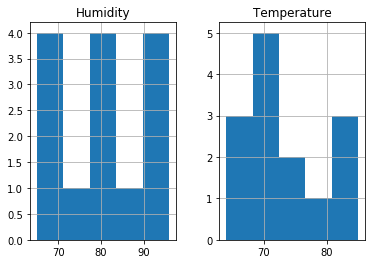

In [121]:
df.hist(['Temperature','Humidity'],bins=5);

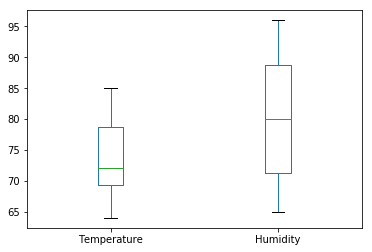

In [122]:
df[['Temperature','Humidity']].plot(kind='box');

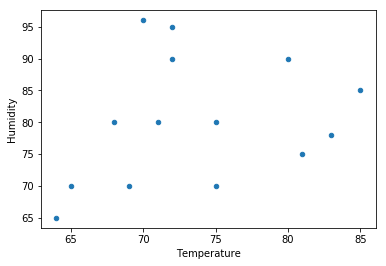

In [123]:
df.plot('Temperature', 'Humidity', kind='scatter');

In [124]:
groups=df.groupby('Outlook')
for name, group in groups:
    print(name)

overcast
rain
sunny


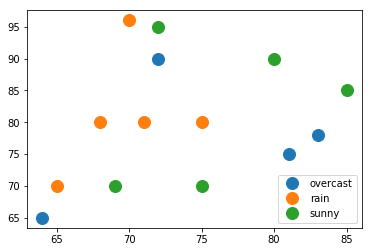

In [125]:
fig, ax = plt.subplots()

ax.margins(0.05)
for name, group in groups:
    ax.plot(group.Temperature, group.Humidity, marker='o', linestyle='', ms=12, label=name)
ax.legend(numpoints=1, loc='lower right')

plt.show()